<a href="https://colab.research.google.com/github/rawanhussein77/agriculture/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


file_path = '/content/File 1.csv'
df = pd.read_csv(file_path)


data_info = df.info()
data_summary = df.describe()
missing_values = df.isnull().sum()


sample_data = df.head()

data_info, data_summary, missing_values, sample_data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


(None,
                  N            P            K  temperature     humidity  \
 count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
 mean     50.551818    53.362727    48.149091    25.616244    71.481779   
 std      36.917334    32.985883    50.647931     5.063749    22.263812   
 min       0.000000     5.000000     5.000000     8.825675    14.258040   
 25%      21.000000    28.000000    20.000000    22.769375    60.261953   
 50%      37.000000    51.000000    32.000000    25.598693    80.473146   
 75%      84.250000    68.000000    49.000000    28.561654    89.948771   
 max     140.000000   145.000000   205.000000    43.675493    99.981876   
 
                 ph     rainfall  
 count  2200.000000  2200.000000  
 mean      6.469480   103.463655  
 std       0.773938    54.958389  
 min       3.504752    20.211267  
 25%       5.971693    64.551686  
 50%       6.425045    94.867624  
 75%       6.923643   124.267508  
 max       9.935091   298.560117  ,


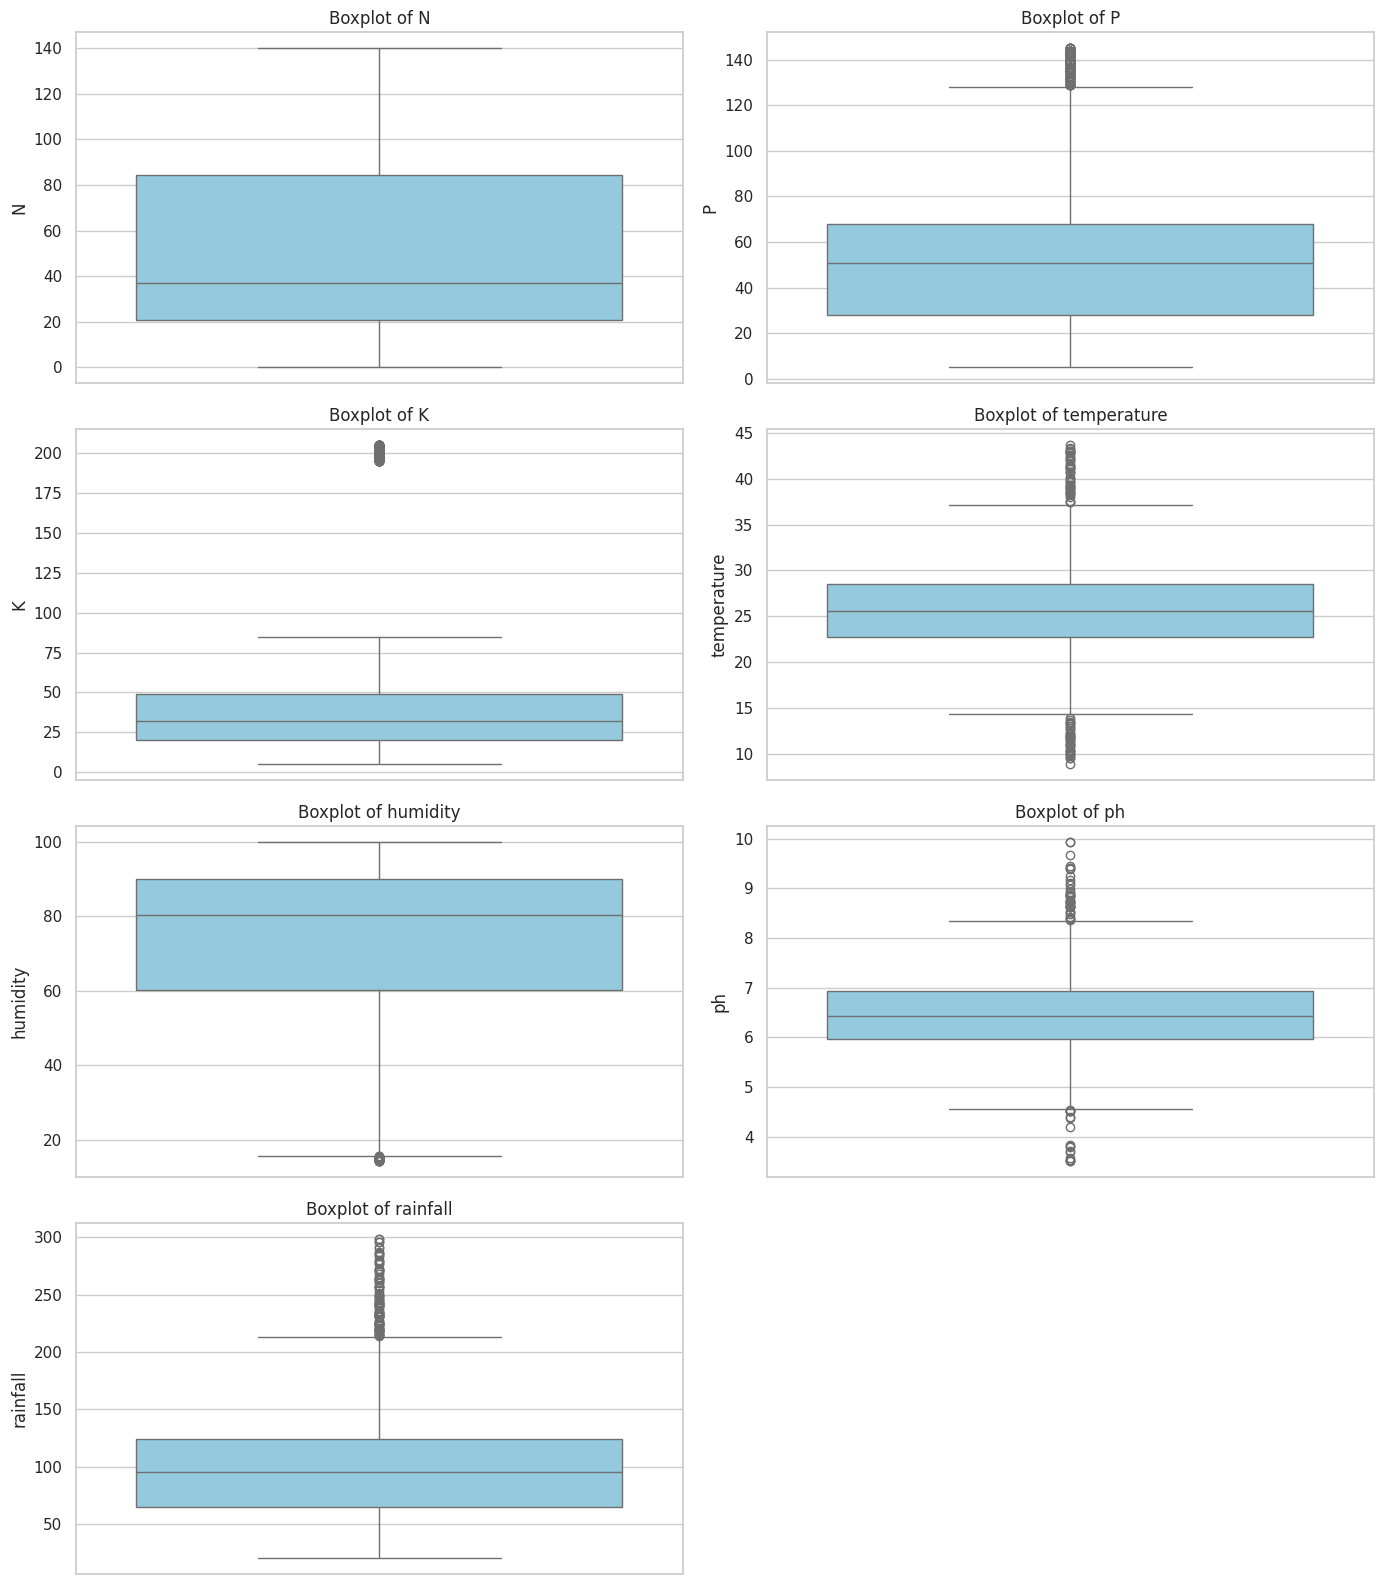

In [4]:

fig, axes = plt.subplots(4, 2, figsize=(14, 16))

axes = axes.flatten()


for i, feature in enumerate(numerical_features):
    sns.boxplot(y=df[feature], ax=axes[i], color="skyblue")
    axes[i].set_title(f"Boxplot of {feature}")


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [5]:

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


cleaned_df = df.copy()
for feature in ["N", "P", "K", "rainfall"]:
    cleaned_df = remove_outliers(cleaned_df, feature)


original_size = df.shape[0]
cleaned_size = cleaned_df.shape[0]

original_size, cleaned_size


(2200, 1956)

In [6]:
from sklearn.preprocessing import StandardScaler


features_to_scale = ["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]


scaler = StandardScaler()


cleaned_df[features_to_scale] = scaler.fit_transform(cleaned_df[features_to_scale])


cleaned_df.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,0.991232,-0.147837,0.601944,-1.045606,0.541242,-0.020165,1.962591,rice
1,0.857853,0.571152,0.484015,-0.859665,0.467633,0.657870,2.419233,rice
3,0.564419,-0.462394,0.425051,0.125788,0.460579,0.584764,2.731269,rice
7,1.097935,0.346468,0.425051,-1.171276,0.580224,-1.014020,2.714138,rice
8,0.964556,0.391405,0.307122,-0.286547,0.608264,0.210903,2.492209,rice


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


X = cleaned_df[features_to_scale]
y = cleaned_df["label"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


model = LogisticRegression(max_iter=500, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy, report


(0.9719387755102041,
 '              precision    recall  f1-score   support\n\n      banana       1.00      1.00      1.00        20\n   blackgram       1.00      0.80      0.89        20\n    chickpea       1.00      1.00      1.00        20\n     coconut       1.00      1.00      1.00        20\n      coffee       1.00      1.00      1.00        20\n      cotton       1.00      1.00      1.00        20\n        jute       0.83      0.95      0.88        20\n kidneybeans       0.95      1.00      0.98        20\n      lentil       0.80      1.00      0.89        20\n       maize       1.00      1.00      1.00        20\n       mango       1.00      1.00      1.00        20\n   mothbeans       1.00      0.95      0.97        20\n    mungbean       1.00      1.00      1.00        20\n   muskmelon       1.00      1.00      1.00        20\n      orange       1.00      1.00      1.00        20\n      papaya       1.00      1.00      1.00        20\n  pigeonpeas       1.00      0.95      0

In [9]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)


accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

accuracy_rf, report_rf


(0.9974489795918368,
 '              precision    recall  f1-score   support\n\n      banana       1.00      1.00      1.00        20\n   blackgram       1.00      1.00      1.00        20\n    chickpea       1.00      1.00      1.00        20\n     coconut       1.00      1.00      1.00        20\n      coffee       1.00      1.00      1.00        20\n      cotton       1.00      1.00      1.00        20\n        jute       0.95      1.00      0.98        20\n kidneybeans       1.00      1.00      1.00        20\n      lentil       1.00      1.00      1.00        20\n       maize       1.00      1.00      1.00        20\n       mango       1.00      1.00      1.00        20\n   mothbeans       1.00      1.00      1.00        20\n    mungbean       1.00      1.00      1.00        20\n   muskmelon       1.00      1.00      1.00        20\n      orange       1.00      1.00      1.00        20\n      papaya       1.00      1.00      1.00        20\n  pigeonpeas       1.00      1.00      1

In [37]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)


with open("classification_report.txt", "w") as file:
    file.write(f"Accuracy: {accuracy_rf}\n\n")
    file.write("Classification Report:\n")
    file.write(report_rf)

print("classification_report.txt")


classification_report.txt


In [38]:
from google.colab import files
files.download("classification_report.txt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>